In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('../../data/Accidentes_2013_2023.csv')
df

,año,fall_les,tipo_veh,modelo_veh,g_modelo_veh,marca,color,hora_ocu_fall,g_hora_fall,g_hora_5_fall,día_sem_ocu_fall,mes_ocu_fall,causa_acc
0,2013,Lesionado,Automóvil,2010-2019,ignorado,Avanti,Blanco,5,00:00 a 05:59,ignorado,Martes,Enero,Choque
1,2013,Lesionado,Automóvil,2010-2019,ignorado,Avanti,Blanco,5,00:00 a 05:59,ignorado,Martes,Enero,Choque
2,2013,Lesionado,Automóvil,2010-2019,ignorado,Avanti,Blanco,5,00:00 a 05:59,ignorado,Martes,Enero,Choque
3,2013,Fallecido,Motocicleta,2010-2019,ignorado,Great Wall,Rojo,Ignorado,00:00 a 05:59,ignorado,Martes,Enero,Choque
4,2013,Lesionado,Motocicleta,2010-2019,ignorado,Great Wall,Rojo,Ignorado,00:00 a 05:59,ignorado,Martes,Enero,Choque
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99510,2020,Lesionado,Motocicleta,Ignorado,Ignorado,TVS Apache,Negro,13,12:00 a 17:59,Tarde,Jueves,Diciembre,Atropello
99511,2020,Lesionado,Motocicleta,Ignorado,Ignorado,TVS Apache,Negro,13,12:00 a 17:59,Tarde,Jueves,Diciembre,Atropello
99512,2020,Lesionado,Motocicleta,Ignorado,Ignorado,TVS Apache,Negro,13,12:00 a 17:59,Tarde,Jueves,Diciembre,Atropello
99513,2020,Fallecido,Motocicleta,2019,2010-2019,MRT,Rojo,18,18:00 a 23:59,Noche,Jueves,Diciembre,Atropello


# Exploracion de datos

In [2]:
df.columns = df.columns.str.strip() 

In [3]:
# Mostrar cantidad de valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

# Ver la distribución de clases en la variable objetivo
fall_les_distribution = df['fall_les'].value_counts(dropna=False)
print("\nDistribución de clases en 'fall_les':\n", fall_les_distribution)

Valores faltantes por columna:
 año                     0
fall_les            22566
tipo_veh                0
modelo_veh              0
g_modelo_veh            0
marca                   0
color                   0
hora_ocu_fall           0
g_hora_fall             0
g_hora_5_fall           0
día_sem_ocu_fall        0
mes_ocu_fall            0
causa_acc               0
dtype: int64

Distribución de clases en 'fall_les':
 fall_les
Lesionado    64038
NaN          22566
Fallecido    12911
Name: count, dtype: int64


# Limpieza de datos

In [4]:
# Eliminar filas donde 'fall_les' es NaN
df = df.dropna(subset=['fall_les'])

# Confirmar que se eliminaron
print("Valores faltantes por columna después de limpiar:")
print(df.isna().sum())

print("\nDistribución de clases en 'fall_les':")
print(df['fall_les'].value_counts())

Valores faltantes por columna después de limpiar:
año                 0
fall_les            0
tipo_veh            0
modelo_veh          0
g_modelo_veh        0
marca               0
color               0
hora_ocu_fall       0
g_hora_fall         0
g_hora_5_fall       0
día_sem_ocu_fall    0
mes_ocu_fall        0
causa_acc           0
dtype: int64

Distribución de clases en 'fall_les':
fall_les
Lesionado    64038
Fallecido    12911
Name: count, dtype: int64


In [5]:
selected_columns = [
    'fall_les', 'modelo_veh', 'g_modelo_veh', 'tipo_veh', 'causa_acc', 'día_sem_ocu_fall'
]
df = df[selected_columns]

df

,fall_les,modelo_veh,g_modelo_veh,tipo_veh,causa_acc,día_sem_ocu_fall
0,Lesionado,2010-2019,ignorado,Automóvil,Choque,Martes
1,Lesionado,2010-2019,ignorado,Automóvil,Choque,Martes
2,Lesionado,2010-2019,ignorado,Automóvil,Choque,Martes
3,Fallecido,2010-2019,ignorado,Motocicleta,Choque,Martes
4,Lesionado,2010-2019,ignorado,Motocicleta,Choque,Martes
...,...,...,...,...,...,...
99510,Lesionado,Ignorado,Ignorado,Motocicleta,Atropello,Jueves
99511,Lesionado,Ignorado,Ignorado,Motocicleta,Atropello,Jueves
99512,Lesionado,Ignorado,Ignorado,Motocicleta,Atropello,Jueves
99513,Fallecido,2019,2010-2019,Motocicleta,Atropello,Jueves


# Visualizacion de datos

In [6]:
df.shape

(76949, 6)

In [7]:
df.columns

Index(['fall_les', 'modelo_veh', 'g_modelo_veh', 'tipo_veh', 'causa_acc',
       'día_sem_ocu_fall'],
      dtype='object')

In [8]:
df.groupby('fall_les').size()

fall_les
Fallecido    12911
Lesionado    64038
dtype: int64

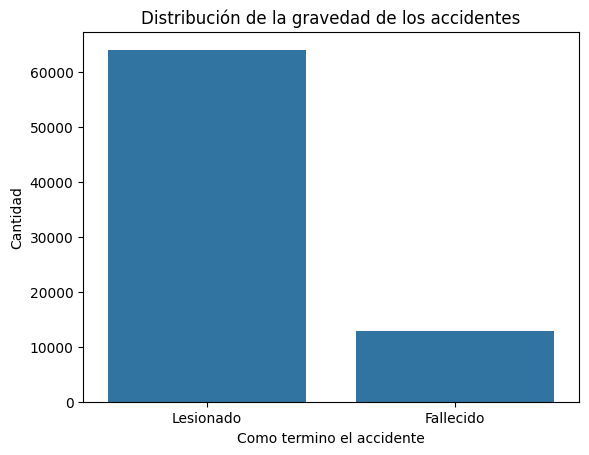

In [9]:
# Contar las ocurrencias de cada clase
conteo = df['fall_les'].value_counts().reset_index()
conteo.columns = ['Como termino el accidente', 'Cantidad']

# Graficar
sns.barplot(x='Como termino el accidente', y='Cantidad', data=conteo)
plt.xlabel("Como termino el accidente")
plt.ylabel("Cantidad")
plt.title("Distribución de la gravedad de los accidentes")
plt.show()

# Entrenamiento y pruebas


In [10]:
# Separar X e y
X = df.drop(columns=['fall_les'])
y = df['fall_les']

# One-hot encoding de variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Codificar clase objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# Modelo SVM Lineal

In [11]:
# Entrenamiento con LinearSVC
modelo = LinearSVC(dual=False, max_iter=10000, random_state=42, class_weight='balanced')
modelo.fit(X_train, y_train)

LinearSVC(class_weight='balanced', dual=False, max_iter=10000, random_state=42)

## Validacion Cruzada

In [12]:
# Validación cruzada estratificada 5-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(modelo, X_scaled, y_encoded, cv=cv, scoring='accuracy')

# Promedio y desviación estándar
scores_mean = np.mean(scores)
scores_std = np.std(scores)

print("Accuracies por fold:", scores)
print("Promedio:", scores_mean) 
print("Desviación estándar:", scores_std)

Accuracies por fold: [0.72768031 0.72573099 0.71546459 0.7137102  0.71655078]
Promedio: 0.7198273755787268
Desviación estándar: 0.005722082139319459


## Matriz de confusion

Accuracy: 0.720164609053498
Reporte de clasificación:
               precision    recall  f1-score   support

   Fallecido       0.32      0.61      0.42      3873
   Lesionado       0.90      0.74      0.82     19212

    accuracy                           0.72     23085
   macro avg       0.61      0.67      0.62     23085
weighted avg       0.81      0.72      0.75     23085



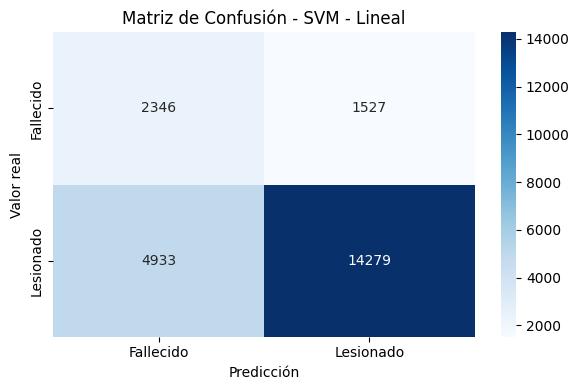

In [13]:
modelo.fit(X_train, y_train)

# Predicción y métricas
y_pred = modelo.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Reporte de clasificación:\n", report)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - SVM - Lineal")
plt.tight_layout()
plt.show()


# CatBooster

CatBoostClassifier es un algoritmo de aprendizaje automático desarrollado por Yandex, diseñado para manejar eficientemente variables categóricas sin necesidad de preprocesamiento manual. Se basa en el método de gradient boosting sobre árboles de decisión, incorporando innovaciones que mejoran su rendimiento y precisión.

### ¿Por qué es buena el caso?
Tienes muchas variables categóricas → CatBoost las maneja sin codificarlas manualmente.

Hay clases desbalanceadas → puedes usar auto_class_weights.

Tienes muchos datos (~100,000 filas) → CatBoost escala muy bien y entrena rápido.

Evitar tunear demasiado → CatBoost tiene hiperparámetros robustos por defecto.

In [14]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    auto_class_weights='Balanced',
    random_state=42
)

In [15]:
# 2. Validación cruzada estratificada (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(cat_model, X_scaled, y_encoded, cv=cv, scoring='accuracy')

# 3. Imprimir métricas de CV
print("Accuracies por fold:", scores)
print("Promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Accuracies por fold: [0.70740741 0.7079922  0.70760234 0.70532814 0.69640652]
Promedio: 0.7049473217222111
Desviación estándar: 0.004369500699870241


In [16]:
# 4. Entrenamiento final
cat_model.fit(X_train, y_train)

# 5. Predicción
y_pred = cat_model.predict(X_test)

# 6. Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.7075157028373402

Classification Report:
              precision    recall  f1-score   support

   Fallecido       0.32      0.69      0.44      3873
   Lesionado       0.92      0.71      0.80     19212

    accuracy                           0.71     23085
   macro avg       0.62      0.70      0.62     23085
weighted avg       0.82      0.71      0.74     23085



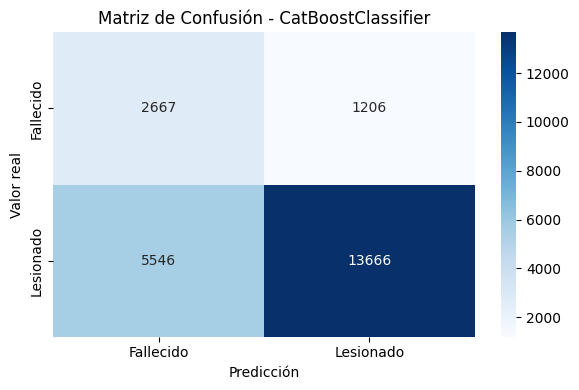

In [17]:
# 7. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - CatBoostClassifier")
plt.tight_layout()
plt.show()